In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

## Load All Captured Images

Load all the .npy files from the explore directory.

In [2]:
# Set path to captured images
data_dir = Path('../data/explore')

# Find all capture files
capture_files = sorted(data_dir.glob('capture_*.npy'))

print(f"Found {len(capture_files)} captured images in {data_dir}")

if len(capture_files) > 0:
    # Load first file to check structure
    sample_data = np.load(capture_files[0], allow_pickle=True).item()
    print(f"\nData structure:")
    for key in sample_data.keys():
        value = sample_data[key]
        if isinstance(value, np.ndarray):
            print(f"  {key}: shape={value.shape}, dtype={value.dtype}")
        else:
            print(f"  {key}: {type(value).__name__} = {value}")
else:
    print("\n⚠ No capture files found. Please run the path planning notebook first.")

Found 8 captured images in ../data/explore

Data structure:
  rgb: shape=(480, 640, 3), dtype=uint8
  depth: shape=(480, 640), dtype=float32
  camera_position: shape=(3,), dtype=float64
  camera_rotation: shape=(3, 3), dtype=float64
  camera_pose_matrix: shape=(4, 4), dtype=float64
  waypoint_index: int = 0
  time: float = 0.0
  base_position: shape=(3,), dtype=float64
  width: int = 640
  height: int = 480
  has_real_images: bool = False


## Visualize Single Image (RGB and Depth)

Display a single RGB-D capture with detailed information.

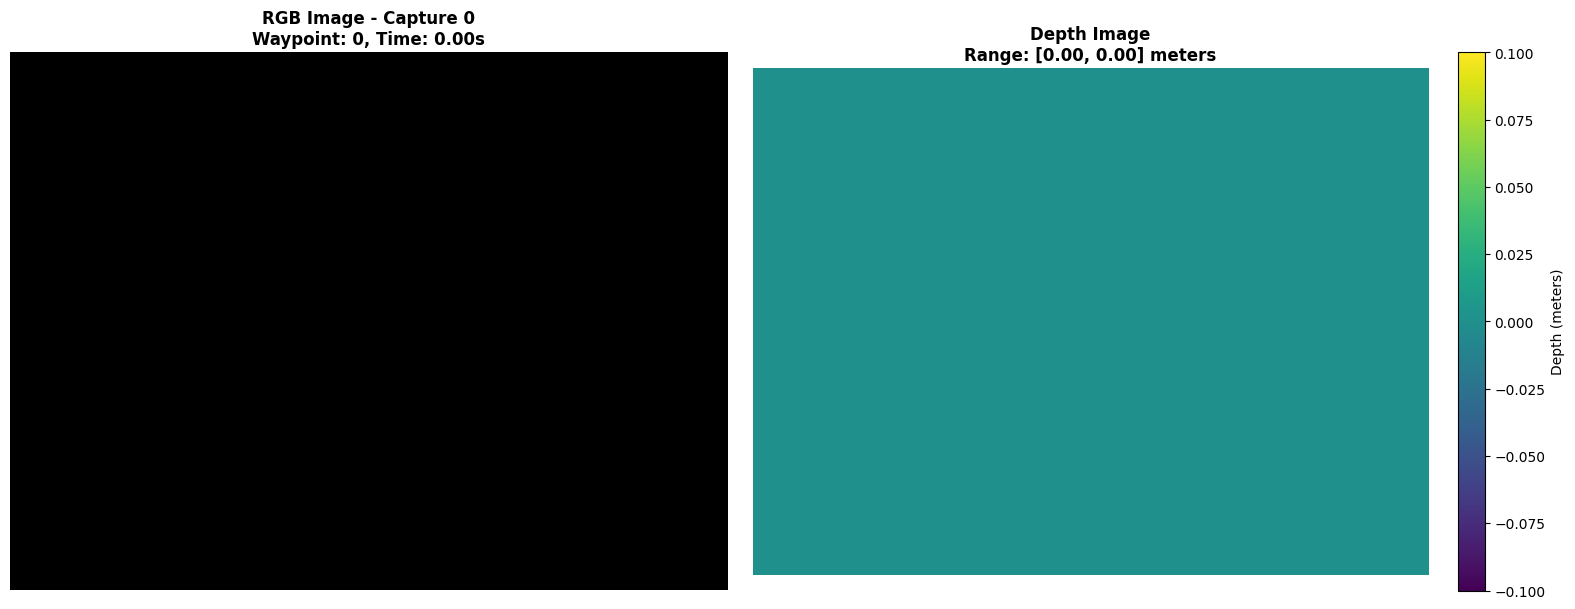

Capture 0 Information:
File: capture_0000.npy
Waypoint index: 0
Timestamp: 0.00 seconds

Robot base position: (-4.000, 0.000, 0.100)
Camera position: (-4.000, 0.000, 1.758)

Image dimensions: 640x480
Depth range: [0.000, 0.000] meters
Depth mean: 0.000 meters

Camera rotation matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
# Select which capture to visualize (change this number)
capture_index = 0

if len(capture_files) > 0:
    # Load the selected capture
    data = np.load(capture_files[capture_index], allow_pickle=True).item()
    
    rgb = data['rgb']
    depth = data['depth']
    camera_pos = data['camera_position']
    camera_rot = data['camera_rotation']
    base_pos = data['base_position']
    waypoint_idx = data['waypoint_index']
    timestamp = data['time']
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # RGB image
    axes[0].imshow(rgb)
    axes[0].set_title(f'RGB Image - Capture {capture_index}\nWaypoint: {waypoint_idx}, Time: {timestamp:.2f}s', 
                     fontsize=12, fontweight='bold')
    axes[0].axis('off')
    
    # Depth image
    depth_vis = axes[1].imshow(depth, cmap='viridis')
    axes[1].set_title(f'Depth Image\nRange: [{depth.min():.2f}, {depth.max():.2f}] meters', 
                     fontsize=12, fontweight='bold')
    axes[1].axis('off')
    
    # Add colorbar
    cbar = plt.colorbar(depth_vis, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label('Depth (meters)', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed information
    print("="*60)
    print(f"Capture {capture_index} Information:")
    print("="*60)
    print(f"File: {capture_files[capture_index].name}")
    print(f"Waypoint index: {waypoint_idx}")
    print(f"Timestamp: {timestamp:.2f} seconds")
    print(f"\nRobot base position: ({base_pos[0]:.3f}, {base_pos[1]:.3f}, {base_pos[2]:.3f})")
    print(f"Camera position: ({camera_pos[0]:.3f}, {camera_pos[1]:.3f}, {camera_pos[2]:.3f})")
    print(f"\nImage dimensions: {rgb.shape[1]}x{rgb.shape[0]}")
    print(f"Depth range: [{depth.min():.3f}, {depth.max():.3f}] meters")
    print(f"Depth mean: {depth.mean():.3f} meters")
    print(f"\nCamera rotation matrix:")
    print(camera_rot)
else:
    print("No captures available to visualize.")

## Visualize Multiple Captures in Grid

Display multiple RGB-D pairs in a grid layout.

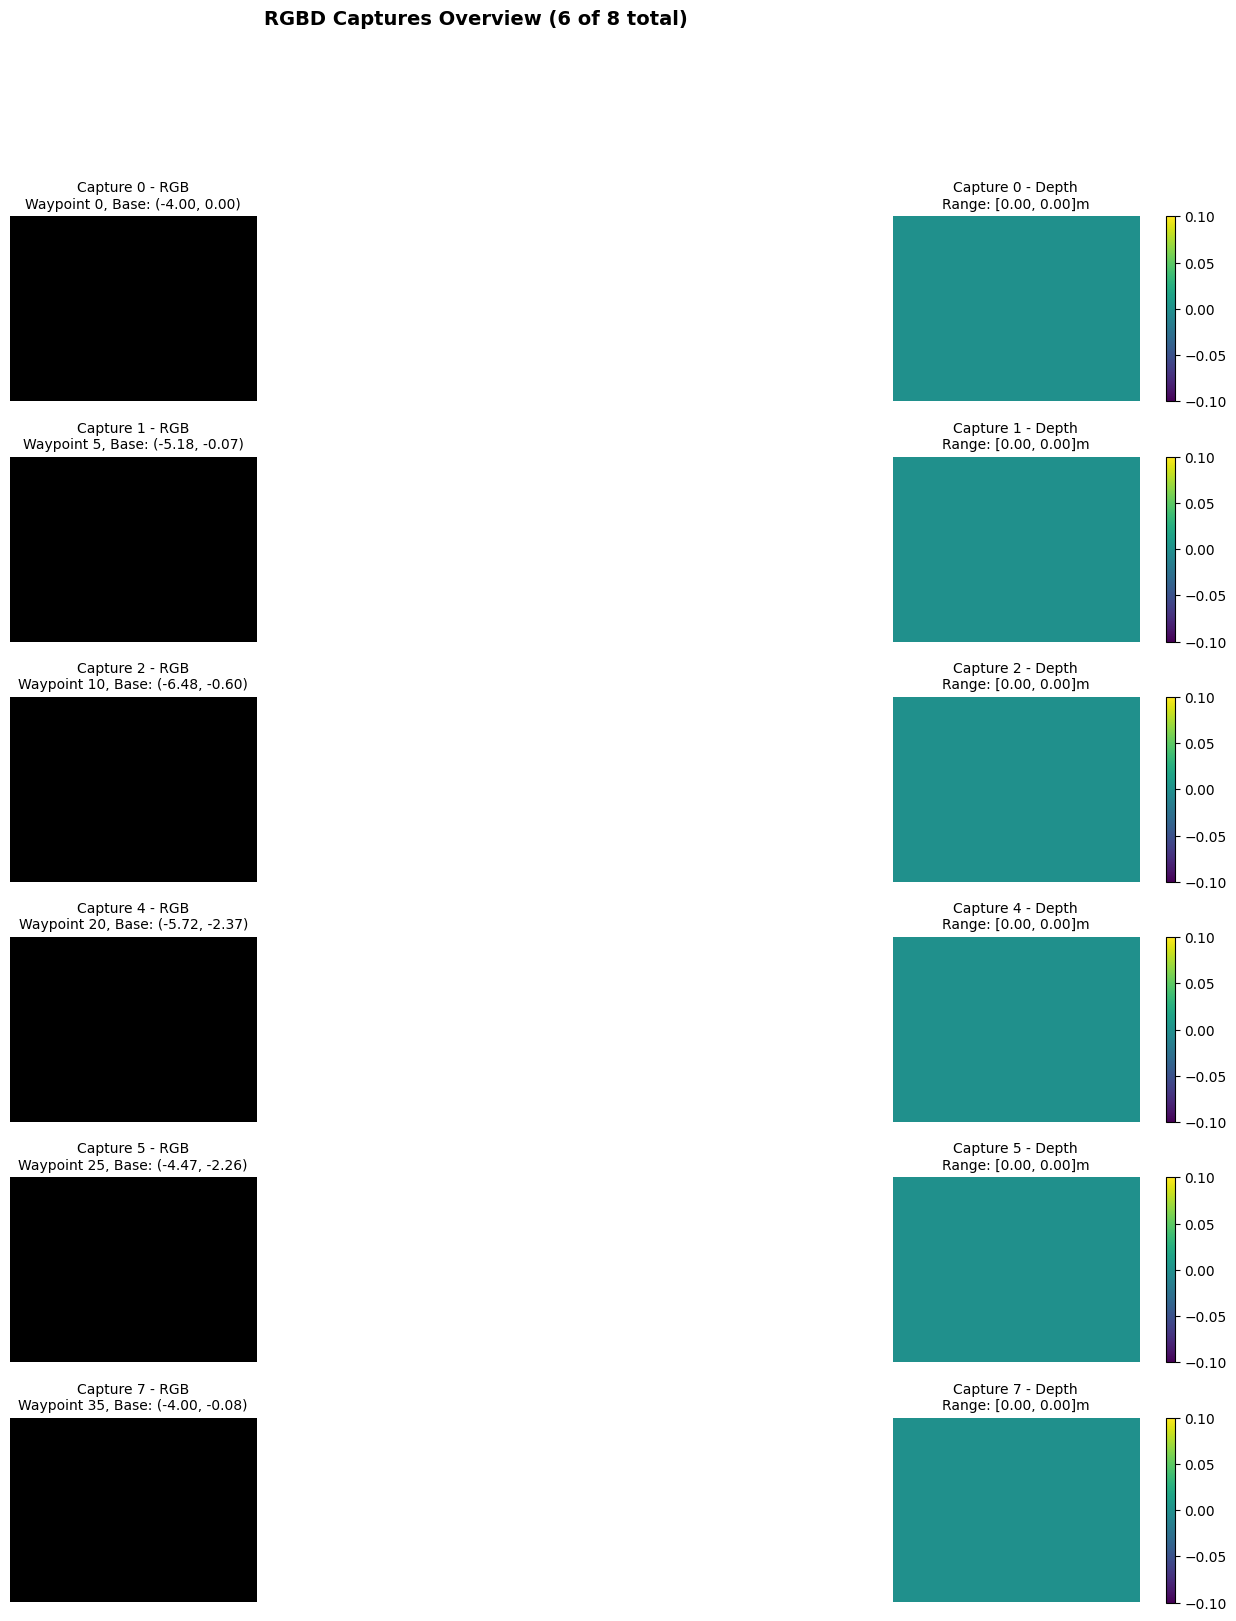

Displayed 6 of 8 total captures


In [4]:
if len(capture_files) > 0:
    # Number of captures to show
    num_to_show = min(6, len(capture_files))
    
    # Create figure with grid layout
    fig = plt.figure(figsize=(18, 3*num_to_show))
    gs = gridspec.GridSpec(num_to_show, 2, figure=fig, wspace=0.1, hspace=0.3)
    
    # Select evenly spaced captures
    indices = np.linspace(0, len(capture_files)-1, num_to_show, dtype=int)
    
    for row, idx in enumerate(indices):
        # Load capture
        data = np.load(capture_files[idx], allow_pickle=True).item()
        
        rgb = data['rgb']
        depth = data['depth']
        waypoint_idx = data['waypoint_index']
        base_pos = data['base_position']
        
        # RGB subplot
        ax_rgb = fig.add_subplot(gs[row, 0])
        ax_rgb.imshow(rgb)
        ax_rgb.set_title(f'Capture {idx} - RGB\nWaypoint {waypoint_idx}, Base: ({base_pos[0]:.2f}, {base_pos[1]:.2f})', 
                        fontsize=10)
        ax_rgb.axis('off')
        
        # Depth subplot
        ax_depth = fig.add_subplot(gs[row, 1])
        depth_im = ax_depth.imshow(depth, cmap='viridis')
        ax_depth.set_title(f'Capture {idx} - Depth\nRange: [{depth.min():.2f}, {depth.max():.2f}]m', 
                          fontsize=10)
        ax_depth.axis('off')
        
        # Add colorbar for depth
        plt.colorbar(depth_im, ax=ax_depth, fraction=0.046, pad=0.04)
    
    plt.suptitle(f'RGBD Captures Overview ({num_to_show} of {len(capture_files)} total)', 
                fontsize=14, fontweight='bold', y=0.995)
    plt.show()
    
    print(f"Displayed {num_to_show} of {len(capture_files)} total captures")
else:
    print("No captures available to visualize.")

## Visualize Camera Trajectory in 3D

Show the 3D trajectory of camera positions during exploration.

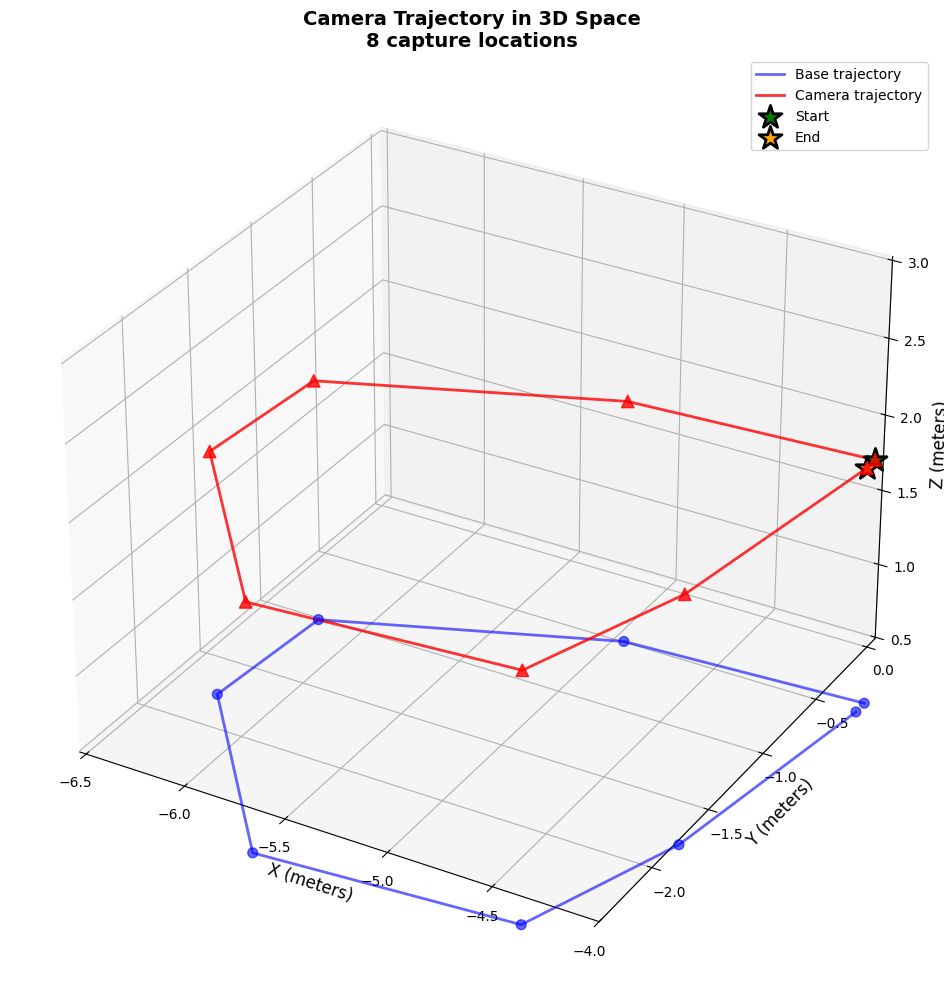

Trajectory Statistics:
Number of captures: 8

Base position range:
  X: [-6.532, -4.000]
  Y: [-2.365, 0.000]
  Z: [0.100, 0.100]

Camera position range:
  X: [-6.532, -4.000]
  Y: [-2.365, 0.000]
  Z: [1.758, 1.758]

Total distance traveled: 8.126 meters


In [5]:
if len(capture_files) > 0:
    # Extract all camera positions
    camera_positions = []
    base_positions = []
    
    for capture_file in capture_files:
        data = np.load(capture_file, allow_pickle=True).item()
        camera_positions.append(data['camera_position'])
        base_positions.append(data['base_position'])
    
    camera_positions = np.array(camera_positions)
    base_positions = np.array(base_positions)
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot base trajectory
    ax.plot(base_positions[:, 0], base_positions[:, 1], base_positions[:, 2], 
           'b-', linewidth=2, alpha=0.6, label='Base trajectory')
    ax.scatter(base_positions[:, 0], base_positions[:, 1], base_positions[:, 2], 
              c='blue', s=50, alpha=0.6, marker='o')
    
    # Plot camera trajectory
    ax.plot(camera_positions[:, 0], camera_positions[:, 1], camera_positions[:, 2], 
           'r-', linewidth=2, alpha=0.8, label='Camera trajectory')
    ax.scatter(camera_positions[:, 0], camera_positions[:, 1], camera_positions[:, 2], 
              c='red', s=80, alpha=0.8, marker='^')
    
    # Mark start and end
    ax.scatter(camera_positions[0, 0], camera_positions[0, 1], camera_positions[0, 2], 
              c='green', s=300, marker='*', edgecolors='black', linewidths=2, 
              label='Start', zorder=10)
    ax.scatter(camera_positions[-1, 0], camera_positions[-1, 1], camera_positions[-1, 2], 
              c='orange', s=300, marker='*', edgecolors='black', linewidths=2, 
              label='End', zorder=10)
    
    ax.set_xlabel('X (meters)', fontsize=12)
    ax.set_ylabel('Y (meters)', fontsize=12)
    ax.set_zlabel('Z (meters)', fontsize=12)
    ax.set_title(f'Camera Trajectory in 3D Space\n{len(capture_files)} capture locations', 
                fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Set equal aspect ratio
    max_range = np.array([camera_positions[:, 0].max()-camera_positions[:, 0].min(),
                          camera_positions[:, 1].max()-camera_positions[:, 1].min(),
                          camera_positions[:, 2].max()-camera_positions[:, 2].min()]).max() / 2.0
    
    mid_x = (camera_positions[:, 0].max()+camera_positions[:, 0].min()) * 0.5
    mid_y = (camera_positions[:, 1].max()+camera_positions[:, 1].min()) * 0.5
    mid_z = (camera_positions[:, 2].max()+camera_positions[:, 2].min()) * 0.5
    
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    plt.tight_layout()
    plt.show()
    
    print("="*60)
    print("Trajectory Statistics:")
    print("="*60)
    print(f"Number of captures: {len(capture_files)}")
    print(f"\nBase position range:")
    print(f"  X: [{base_positions[:, 0].min():.3f}, {base_positions[:, 0].max():.3f}]")
    print(f"  Y: [{base_positions[:, 1].min():.3f}, {base_positions[:, 1].max():.3f}]")
    print(f"  Z: [{base_positions[:, 2].min():.3f}, {base_positions[:, 2].max():.3f}]")
    print(f"\nCamera position range:")
    print(f"  X: [{camera_positions[:, 0].min():.3f}, {camera_positions[:, 0].max():.3f}]")
    print(f"  Y: [{camera_positions[:, 1].min():.3f}, {camera_positions[:, 1].max():.3f}]")
    print(f"  Z: [{camera_positions[:, 2].min():.3f}, {camera_positions[:, 2].max():.3f}]")
    
    # Calculate total distance traveled
    total_distance = 0
    for i in range(len(base_positions) - 1):
        total_distance += np.linalg.norm(base_positions[i+1] - base_positions[i])
    print(f"\nTotal distance traveled: {total_distance:.3f} meters")
else:
    print("No captures available to visualize.")

## Analyze Depth Statistics

Analyze depth information across all captures.

/mnt/e/Harvard/Fall2025/6.4212/final_project/locomanipulation-4212-final-project/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/e/Harvard/Fall2025/6.4212/final_project/locomanipulation-4212-final-project/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


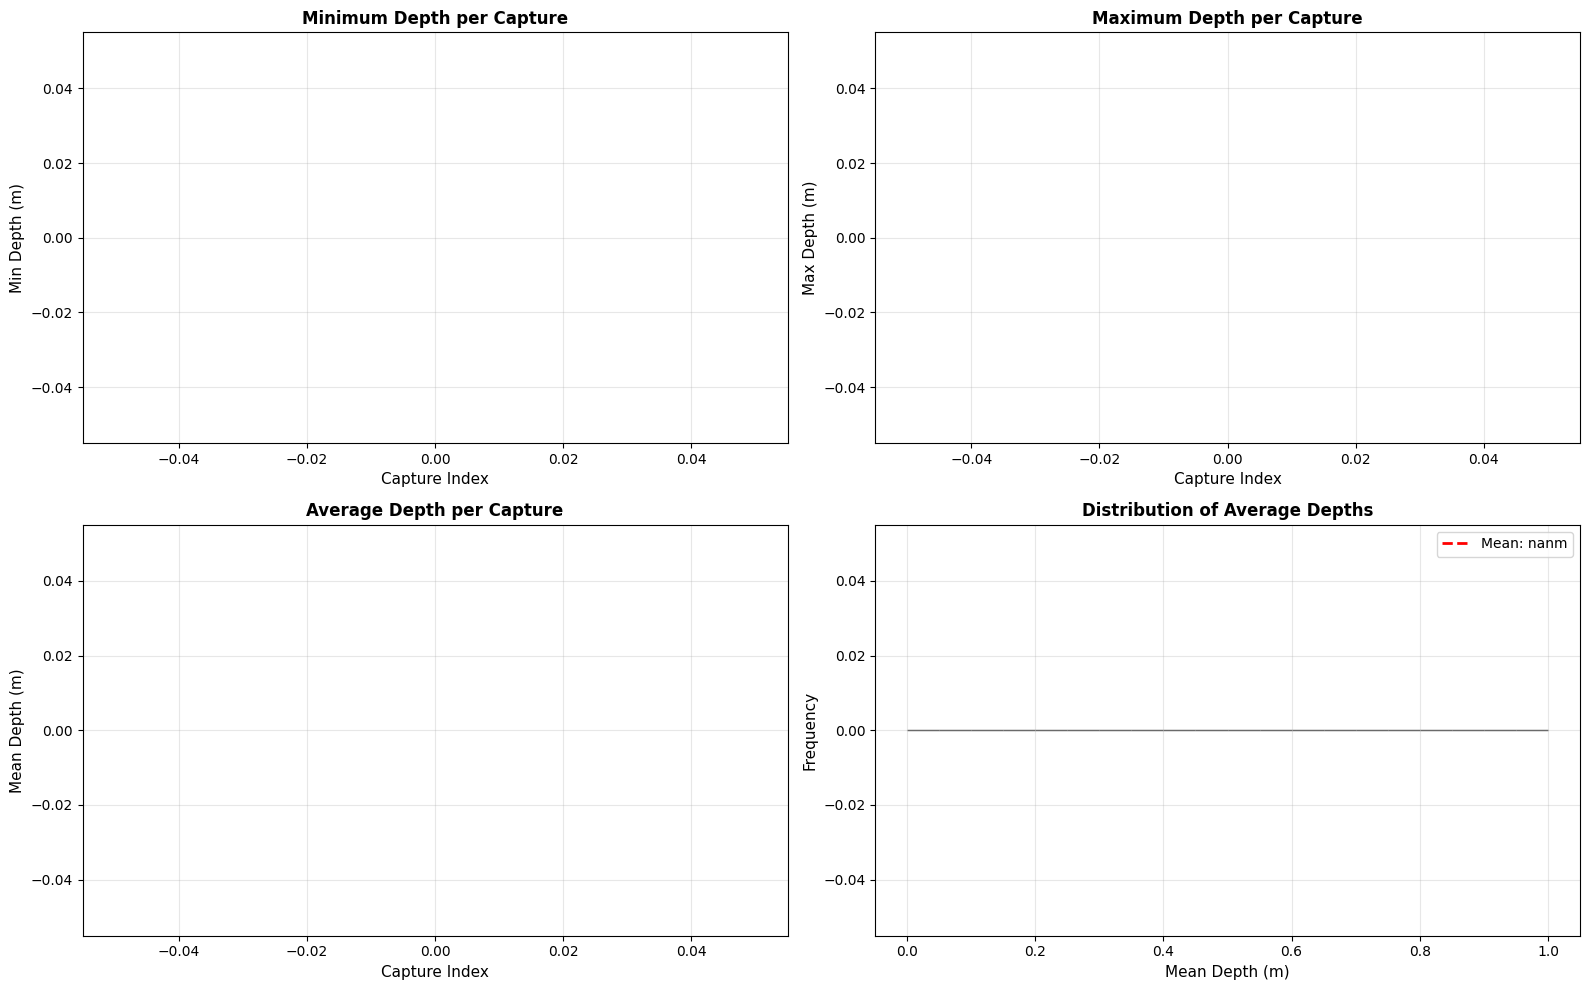

Depth Statistics Summary:


ValueError: zero-size array to reduction operation minimum which has no identity

In [6]:
if len(capture_files) > 0:
    # Collect depth statistics
    depth_mins = []
    depth_maxs = []
    depth_means = []
    depth_stds = []
    
    for capture_file in capture_files:
        data = np.load(capture_file, allow_pickle=True).item()
        depth = data['depth']
        
        # Filter out invalid depth values (0 or inf)
        valid_depth = depth[(depth > 0) & (depth < 100)]
        
        if len(valid_depth) > 0:
            depth_mins.append(valid_depth.min())
            depth_maxs.append(valid_depth.max())
            depth_means.append(valid_depth.mean())
            depth_stds.append(valid_depth.std())
    
    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Min depth over captures
    axes[0, 0].plot(depth_mins, 'b-', linewidth=2)
    axes[0, 0].scatter(range(len(depth_mins)), depth_mins, c='blue', s=30, alpha=0.6)
    axes[0, 0].set_xlabel('Capture Index', fontsize=11)
    axes[0, 0].set_ylabel('Min Depth (m)', fontsize=11)
    axes[0, 0].set_title('Minimum Depth per Capture', fontsize=12, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Max depth over captures
    axes[0, 1].plot(depth_maxs, 'r-', linewidth=2)
    axes[0, 1].scatter(range(len(depth_maxs)), depth_maxs, c='red', s=30, alpha=0.6)
    axes[0, 1].set_xlabel('Capture Index', fontsize=11)
    axes[0, 1].set_ylabel('Max Depth (m)', fontsize=11)
    axes[0, 1].set_title('Maximum Depth per Capture', fontsize=12, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Mean depth over captures
    axes[1, 0].plot(depth_means, 'g-', linewidth=2)
    axes[1, 0].scatter(range(len(depth_means)), depth_means, c='green', s=30, alpha=0.6)
    axes[1, 0].set_xlabel('Capture Index', fontsize=11)
    axes[1, 0].set_ylabel('Mean Depth (m)', fontsize=11)
    axes[1, 0].set_title('Average Depth per Capture', fontsize=12, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Depth distribution histogram
    axes[1, 1].hist(depth_means, bins=20, color='purple', alpha=0.7, edgecolor='black')
    axes[1, 1].axvline(np.mean(depth_means), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {np.mean(depth_means):.2f}m')
    axes[1, 1].set_xlabel('Mean Depth (m)', fontsize=11)
    axes[1, 1].set_ylabel('Frequency', fontsize=11)
    axes[1, 1].set_title('Distribution of Average Depths', fontsize=12, fontweight='bold')
    axes[1, 1].legend(fontsize=10)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("="*60)
    print("Depth Statistics Summary:")
    print("="*60)
    print(f"Overall minimum depth: {np.min(depth_mins):.3f} meters")
    print(f"Overall maximum depth: {np.max(depth_maxs):.3f} meters")
    print(f"Average depth across all captures: {np.mean(depth_means):.3f} ± {np.std(depth_means):.3f} meters")
    print(f"Median depth: {np.median(depth_means):.3f} meters")
else:
    print("No captures available to analyze.")

## Interactive Capture Browser

Browse through captures interactively (change the index to view different captures).

In [ ]:
if len(capture_files) > 0:
    # Interactive browser - change this value to view different captures
    browse_index = 0  # Change this to view different captures (0 to len(capture_files)-1)
    
    if 0 <= browse_index < len(capture_files):
        data = np.load(capture_files[browse_index], allow_pickle=True).item()
        
        fig = plt.figure(figsize=(18, 8))
        gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)
        
        # RGB image (large)
        ax1 = fig.add_subplot(gs[:, 0:2])
        ax1.imshow(data['rgb'])
        ax1.set_title(f"Capture {browse_index} of {len(capture_files)-1}\nRGB Image", 
                     fontsize=14, fontweight='bold')
        ax1.axis('off')
        
        # Depth image
        ax2 = fig.add_subplot(gs[0, 2])
        depth_im = ax2.imshow(data['depth'], cmap='viridis')
        ax2.set_title('Depth Image', fontsize=12, fontweight='bold')
        ax2.axis('off')
        plt.colorbar(depth_im, ax=ax2, fraction=0.046, pad=0.04)
        
        # Information panel
        ax3 = fig.add_subplot(gs[1, 2])
        ax3.axis('off')
        
        info_text = f"""CAPTURE INFORMATION
        
File: {capture_files[browse_index].name}
Waypoint: {data['waypoint_index']}
Time: {data['time']:.2f}s

Base Position:
  X: {data['base_position'][0]:.3f} m
  Y: {data['base_position'][1]:.3f} m
  Z: {data['base_position'][2]:.3f} m

Camera Position:
  X: {data['camera_position'][0]:.3f} m
  Y: {data['camera_position'][1]:.3f} m
  Z: {data['camera_position'][2]:.3f} m

Image Size: {data['width']}x{data['height']}

Depth Range:
  Min: {data['depth'].min():.3f} m
  Max: {data['depth'].max():.3f} m
  Mean: {data['depth'].mean():.3f} m
"""
        ax3.text(0.05, 0.95, info_text, transform=ax3.transAxes, 
                fontsize=10, verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.suptitle(f'Image Browser - Change browse_index (0-{len(capture_files)-1}) to view different captures', 
                    fontsize=12, y=0.98)
        plt.show()
    else:
        print(f"Invalid browse_index: {browse_index}. Must be between 0 and {len(capture_files)-1}")
else:
    print("No captures available to browse.")

## Export Summary Statistics

Generate a summary of all captures.

In [ ]:
if len(capture_files) > 0:
    print("="*80)
    print("RGBD CAPTURE SUMMARY")
    print("="*80)
    print(f"\nTotal captures: {len(capture_files)}")
    print(f"Data directory: {data_dir}")
    
    # Collect all data
    all_data = []
    for i, capture_file in enumerate(capture_files):
        data = np.load(capture_file, allow_pickle=True).item()
        all_data.append({
            'index': i,
            'file': capture_file.name,
            'waypoint': data['waypoint_index'],
            'time': data['time'],
            'base_x': data['base_position'][0],
            'base_y': data['base_position'][1],
            'base_z': data['base_position'][2],
            'cam_x': data['camera_position'][0],
            'cam_y': data['camera_position'][1],
            'cam_z': data['camera_position'][2],
            'depth_min': data['depth'].min(),
            'depth_max': data['depth'].max(),
            'depth_mean': data['depth'].mean(),
        })
    
    print("\n" + "-"*80)
    print(f"{'Idx':<5} {'File':<20} {'WP':<5} {'Time':<8} {'Base (X,Y,Z)':<25} {'Depth':<15}")
    print("-"*80)
    
    for d in all_data[::max(1, len(all_data)//10)]:
        base_pos = f"({d['base_x']:.2f},{d['base_y']:.2f},{d['base_z']:.2f})"
        depth_info = f"{d['depth_mean']:.2f}m"
        print(f"{d['index']:<5} {d['file']:<20} {d['waypoint']:<5} {d['time']:<8.2f} {base_pos:<25} {depth_info:<15}")
    
    if len(all_data) > 10:
        print(f"... ({len(all_data) - 10} more captures not shown)")
    
    print("="*80)
    print("\nTo view all captures in detail, use the cells above or change browse_index.")
else:
    print("No captures available to summarize.")